In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
# import the dataset 
df = pd.read_csv('metadata.csv')
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [4]:
# Initial data shape
print("Initial data shape:", df.shape)
print("Initial null counts:")
print(df.isnull().sum())

# Convert numeric columns
numeric_cols = ['ambient_temperature', 'test_id', 'uid', 'Capacity', 'Re', 'Rct']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Initial data shape: (7565, 10)
Initial null counts:
type                      0
start_time                0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filename                  0
Capacity               4771
Re                     5609
Rct                    5609
dtype: int64


In [5]:

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Remove rows where all important measurements are null
important_cols = ['Capacity', 'Re', 'Rct']
df_cleaned = df_cleaned.dropna(subset=important_cols, how='all')


In [32]:

print("After cleaning:")
print("Data shape:", df_cleaned.shape)
print("Null counts after cleaning:")
print(df_cleaned.isnull().sum())


After cleaning:
Data shape: (4716, 10)
Null counts after cleaning:
type                      0
start_time                0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filename                  0
Capacity               1947
Re                     2769
Rct                    2769
dtype: int64


In [7]:

# Basic statistics of numeric columns
print("Basic statistics of numeric columns after cleaning:")
print(df_cleaned[numeric_cols].describe())

Basic statistics of numeric columns after cleaning:
       ambient_temperature      test_id          uid     Capacity  \
count          4716.000000  4716.000000  4716.000000  2769.000000   
mean             21.045377   184.864504  3853.095208     1.326543   
std              10.152917   156.657962  2173.563735     0.472517   
min               4.000000     0.000000     1.000000     0.000000   
25%              24.000000    59.000000  1962.500000     1.150286   
50%              24.000000   138.000000  3944.500000     1.428065   
75%              24.000000   272.000000  5715.250000     1.673645   
max              44.000000   614.000000  7564.000000     2.640149   

                 Re           Rct  
count  1.947000e+03  1.947000e+03  
mean  -4.976500e+11  1.055903e+12  
std    2.195872e+13  4.659154e+13  
min   -9.689245e+14 -2.091081e+02  
25%    5.782157e-02  8.155754e-02  
50%    7.255344e-02  1.014191e-01  
75%    9.229960e-02  1.565123e-01  
max    4.482291e+02  2.055843e+15  


In [8]:
# Let's clean up the Re and Rct columns which seem to have extreme values
# First look at their distributions
print("Re and Rct value ranges:")
print("Re range:")
print(df_cleaned['Re'].describe())
print("Rct range:")
print(df_cleaned['Rct'].describe())


Re and Rct value ranges:
Re range:
count    1.947000e+03
mean    -4.976500e+11
std      2.195872e+13
min     -9.689245e+14
25%      5.782157e-02
50%      7.255344e-02
75%      9.229960e-02
max      4.482291e+02
Name: Re, dtype: float64
Rct range:
count    1.947000e+03
mean     1.055903e+12
std      4.659154e+13
min     -2.091081e+02
25%      8.155754e-02
50%      1.014191e-01
75%      1.565123e-01
max      2.055843e+15
Name: Rct, dtype: float64


In [9]:

# Remove extreme outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Clean Re and Rct columns
df_no_outliers = df_cleaned.copy()
for col in ['Re', 'Rct']:
    mask = df_no_outliers[col].notna()
    if mask.any():
        df_no_outliers.loc[mask] = remove_outliers(df_no_outliers[mask], col)


In [10]:

print("After removing outliers:")
print("Data shape:", df_no_outliers.shape)

# Show cleaned statistics
print("Cleaned statistics:")
print(df_no_outliers[['Capacity', 'Re', 'Rct']].describe())

After removing outliers:
Data shape: (4716, 10)
Cleaned statistics:
          Capacity           Re          Rct
count  2769.000000  1933.000000  1933.000000
mean      1.326543     0.075907     0.121837
std       0.472517     0.024161     0.051749
min       0.000000     0.027050     0.039543
25%       1.150286     0.058089     0.081508
50%       1.428065     0.072656     0.100935
75%       1.673645     0.092436     0.154892
max       2.640149     0.179841     0.298464


Text(0.5, 0, 'Battery ID')

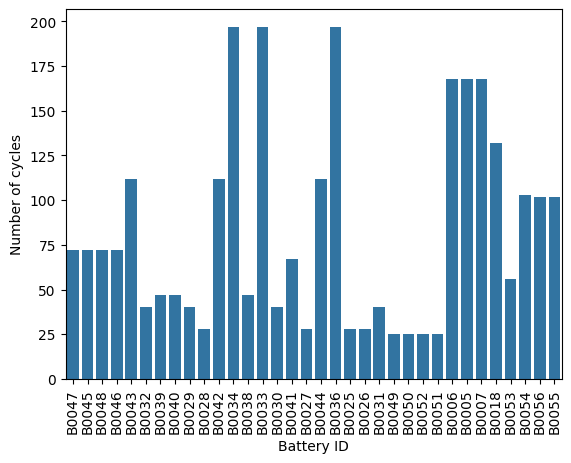

In [ ]:
battery_ids = df["battery_id"].unique()
# number of charge-dischargec per battayer
sns.countplot(data=df[df["type"]=="discharge"], x="battery_id", order=battery_ids, dodge=False)
plt.tick_params(axis='x', rotation=90)
plt.ylabel("Number of cycles")
plt.xlabel("Battery ID")

In [33]:
# counting number of cycles
cycle_count = 0
def assign_cycle(row):
    global cycle_count
    if row['type'] == 'discharge':
        cycle_count += 1
    return cycle_count

df['cycle'] = df.apply(assign_cycle, axis=1)
# saving the updated data 
df.to_csv("updated_metadata.csv")

In [ ]:
# Get unique battery IDs
battery_ids = df['battery_id'].unique()

# Create dictionary to store dataframes
battery_dict = {}

# Populate dictionary
for battery_id in battery_ids:
    # Filter data for current battery
    battery_data = df[df['battery_id'] == battery_id]
    
    # Get impedance measurements with cycle information
    impedance_data = battery_data[battery_data['type'] == 'impedance'][['Re', 'Rct', 'cycle']].reset_index(drop=True)
    
    # Store in dictionary
    battery_dict[battery_id] = impedance_data

# Save the dictionary to a pickle file
with open('battery_data.pkl', 'wb') as pickle_file:
    pickle.dump(battery_dict, pickle_file)

# Display first battery's data as example
print("Example data for first battery ID:", list(battery_dict.keys())[0])
print(battery_dict[list(battery_dict.keys())[0]])

Example data for first battery ID: B0047
          Re       Rct  cycle
0   0.056058  0.200970      1
1   0.053192  0.164734      1
2   0.059638  0.210399      6
3   0.055125  0.175488      6
4   0.058878  0.190957      7
5   0.052813  0.172252      7
6   0.057517  0.196364     12
7   0.053534  0.177707     12
8   0.062031  0.200898     13
9   0.058585  0.184154     13
10  0.062411  0.214393     18
11  0.058089  0.186690     18
12  0.065454  0.221454     23
13  0.058894  0.202839     23
14  0.067437  0.231821     28
15  0.060657  0.213997     28
16  0.070100  0.229878     33
17  0.065507  0.203552     33
18  0.065475  0.236929     34
19  0.064050  0.203094     34
20  0.067098  0.230396     39
21  0.065833  0.220442     39
22  0.069821  0.247872     44
23  0.068788  0.213603     44
24  0.071174  0.236860     49
25  0.067042  0.223946     49
26  0.070233  0.243232     54
27  0.067687  0.222291     54
28  0.071620  0.234037     55
29  0.070681  0.195285     55
30  0.075096  0.238580     60

In [16]:
import pickle

# Save the dictionary to a pickle file
with open('battery_data.pkl', 'wb') as pickle_file:
    pickle.dump(battery_dict, pickle_file)
